# TOPIC - Ransomware Attack Detection: A Research of GoldenEye and GandCrab Malware

## Here I am using the SVM ALgorithm to Detect Malware

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tt

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Dataset
df = pd.read_csv(r"F:\Programs\PycharmProjects\pythonProject\Malware-dataset.csv")

Finding Some Information about Dataset  

In [3]:
df.head()

hash  millisecond  \
0  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            0   
1  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            1   
2  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            2   
3  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            3   
4  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            4   

  classification  state  usage_counter        prio  static_prio  normal_prio  \
0        malware      0              0  3069378560        14274            0   
1        malware      0              0  3069378560        14274            0   
2        malware      0              0  3069378560        14274            0   
3        malware      0              0  3069378560        14274            0   
4        malware      0              0  3069378560        14274            0   

   policy  vm_pgoff  ...  nivcsw  min_flt  maj_flt  fs_excl_counter  \
0       0         0  ...       0        0      120                0   
1       0         0  ...       0        0      120                0   
2       0         0  ...       0        0      120                0   
3       0         0  ...       0        0      120                0   
4       0         0  ...       0        0      120                0   

         lock   utime  stime  gtime  cgtime  signal_nvcsw  
0  3204448256  380690      4      0       0             0  
1  3204448256  380690      4      0       0             0  
2  3204448256  380690      4      0       0             0  
3  3204448256  380690      4      0       0             0  
4  3204448256  380690      4      0       0             0  

[5 rows x 35 columns]

In [4]:
df.shape

(100000, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

Based on the characteristics of the observations, the dataset was created in a Unix / Lunix-based virtual machine for classification purposes, which are harmless with malware software for Android devices. The data set consists of 100,000 observation data and 35 features. Below is a table of specifications and descriptions.


Features           | Description         | Properties
-------------------|---------------------|--------------
hash               | APK/ SHA256         | file name
milisecond         | time
classification     | malware/beign
state	          | flag of unrunable/runnable/stopped tasks
usage_counter      | task structure      |usage counter
prio               | keeps the dynamic priority of a process
static_prio        | static priority of a process
normal_prio        | priority without taking RT-inheritance into account
policy             | planning policy of the process
vm_pgoff           | the offset of the area in the file, in pages.
vm_truncate_count  | used to mark a vma as now dealt with
task_size          | size of current task.
cached_hole_size   | size of free address space hole.
free_area_cache    | first address space hole
mm_users	       | address space users
map_count          | number of memory areas
hiwater_rss	    | peak of resident set size
total_vm	       | total number of pages
shared_vm	      | number of shared pages.
exec_vm	        | number of executable pages.
reserved_vm	    | number of reserved pages.
nr_ptes	        | number of page table entries
end_data	       | end address of code component
last_interval  	| last interval time before thrashing
nvcsw	          | number of volunteer context switches.
nivcsw	         | number of in-volunteer context switches
min_flt	        | minör page faults
maj_flt	        | majör page faults
fs_excl_counter	| ıt holds file system exclusive resources.
lock	           | the read-write synchronization lock used for file system access
utime	          | user time
stime	          | system time
gtime	          | guest time
cgtime	        | cumulative group time. Cumulative resource counter
signal_nvcsw	  | used as cumulative resource counter.

```

In [6]:
df.describe(include="all")

hash    millisecond  \
count                                              100000  100000.000000   
unique                                                100            NaN   
top     42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            NaN   
freq                                                 1000            NaN   
mean                                                  NaN     499.500000   
std                                                   NaN     288.676434   
min                                                   NaN       0.000000   
25%                                                   NaN     249.750000   
50%                                                   NaN     499.500000   
75%                                                   NaN     749.250000   
max                                                   NaN     999.000000   

       classification         state  usage_counter          prio  \
count          100000  1.000000e+05       100000.0  1.000000e+05   
unique              2           NaN            NaN           NaN   
top           malware           NaN            NaN           NaN   
freq            50000           NaN            NaN           NaN   
mean              NaN  1.577683e+05            0.0  3.069706e+09   
std               NaN  9.361726e+05            0.0  2.963061e+05   
min               NaN  0.000000e+00            0.0  3.069190e+09   
25%               NaN  0.000000e+00            0.0  3.069446e+09   
50%               NaN  0.000000e+00            0.0  3.069698e+09   
75%               NaN  4.096000e+03            0.0  3.069957e+09   
max               NaN  4.326605e+07            0.0  3.070222e+09   

          static_prio  normal_prio    policy  vm_pgoff  ...         nivcsw  \
count   100000.000000     100000.0  100000.0  100000.0  ...  100000.000000   
unique            NaN          NaN       NaN       NaN  ...            NaN   
top               NaN          NaN       NaN       NaN  ...            NaN   
freq              NaN          NaN       NaN       NaN  ...            NaN   
mean     18183.900070          0.0       0.0       0.0  ...      32.991160   
std       4609.792765          0.0       0.0       0.0  ...      52.730176   
min      13988.000000          0.0       0.0       0.0  ...       0.000000   
25%      14352.000000          0.0       0.0       0.0  ...       1.000000   
50%      16159.000000          0.0       0.0       0.0  ...       9.000000   
75%      22182.000000          0.0       0.0       0.0  ...      46.000000   
max      31855.000000          0.0       0.0       0.0  ...     365.000000   

              min_flt        maj_flt  fs_excl_counter          lock  \
count   100000.000000  100000.000000    100000.000000  1.000000e+05   
unique            NaN            NaN              NaN           NaN   
top               NaN            NaN              NaN           NaN   
freq              NaN            NaN              NaN           NaN   
mean         2.053130     117.920240         1.109190  3.204448e+09   
std         13.881382       3.116892         2.160466  0.000000e+00   
min          0.000000     112.000000         0.000000  3.204448e+09   
25%          0.000000     114.000000         0.000000  3.204448e+09   
50%          1.000000     120.000000         0.000000  3.204448e+09   
75%          1.000000     120.000000         1.000000  3.204448e+09   
max        256.000000     120.000000        18.000000  3.204448e+09   

                utime          stime         gtime    cgtime  signal_nvcsw  
count   100000.000000  100000.000000  100000.00000  100000.0      100000.0  
unique            NaN            NaN           NaN       NaN           NaN  
top               NaN            NaN           NaN       NaN           NaN  
freq              NaN            NaN           NaN       NaN           NaN  
mean    385415.451970       4.059310       1.66142       0.0           0.0  
std      10144.036494       0.822848       3.26304       0.0           

In [7]:
df.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [8]:
df["classification"].value_counts()

malware    50000
benign     50000
Name: classification, dtype: int64

In [9]:
df['classification'] = df.classification.map({'benign':0, 'malware':1})
df.head()

hash  millisecond  \
0  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            0   
1  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            1   
2  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            2   
3  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            3   
4  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            4   

   classification  state  usage_counter        prio  static_prio  normal_prio  \
0               1      0              0  3069378560        14274            0   
1               1      0              0  3069378560        14274            0   
2               1      0              0  3069378560        14274            0   
3               1      0              0  3069378560        14274            0   
4               1      0              0  3069378560        14274            0   

   policy  vm_pgoff  ...  nivcsw  min_flt  maj_flt  fs_excl_counter  \
0       0         0  ...       0        0      120                0   
1       0         0  ...       0        0      120                0   
2       0         0  ...       0        0      120                0   
3       0         0  ...       0        0      120                0   
4       0         0  ...       0        0      120                0   

         lock   utime  stime  gtime  cgtime  signal_nvcsw  
0  3204448256  380690      4      0       0             0  
1  3204448256  380690      4      0       0             0  
2  3204448256  380690      4      0       0             0  
3  3204448256  380690      4      0       0             0  
4  3204448256  380690      4      0       0             0  

[5 rows x 35 columns]

In [10]:
# Shuffle data
df = df.sample(frac=1).reset_index(drop=True)
df.head()

hash  millisecond  \
0  3ad983456b9031e0b7ce169f9d0a41e6964db5c777b5d4...          513   
1  3d51872172186d55238444384224ca46d0f1a7ab879104...          119   
2               com.i6.FlightSimulatorAirplane3D.apk          202   
3  186d3233e77f4a0c64043da385fb7f0dcd195ee0c1f46d...          729   
4                               com.music.choice.apk          171   

   classification  state  usage_counter        prio  static_prio  normal_prio  \
0               1      0              0  3069812736        14020            0   
1               1      0              0  3069304832        14529            0   
2               0      0              0  3070025728        18078            0   
3               1      0              0  3069628416        14292            0   
4               0   8192              0  3069943808        15985            0   

   policy  vm_pgoff  ...  nivcsw  min_flt  maj_flt  fs_excl_counter  \
0       0         0  ...       0        1      120                0   
1       0         0  ...      11        0      120                0   
2       0         0  ...       0        1      120                1   
3       0         0  ...      45        1      120                0   
4       0         0  ...      26        0      120                0   

         lock   utime  stime  gtime  cgtime  signal_nvcsw  
0  3204448256  372303      3      0       0             0  
1  3204448256  377658      3      0       0             0  
2  3204448256  378208      3      0       0             0  
3  3204448256  381198      4      0       0             0  
4  3204448256  384854      4      0       0             0  

[5 rows x 35 columns]

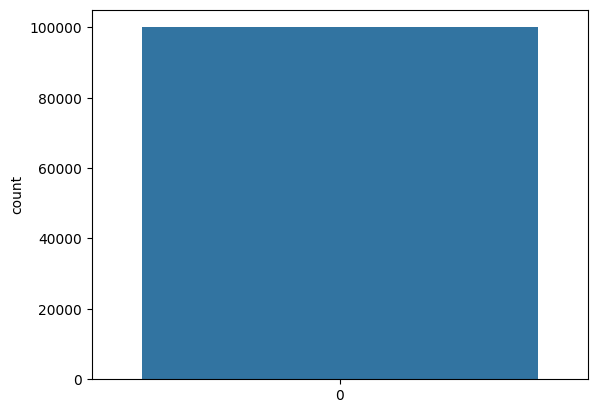

In [11]:
sns.countplot(df["classification"])
plt.show()

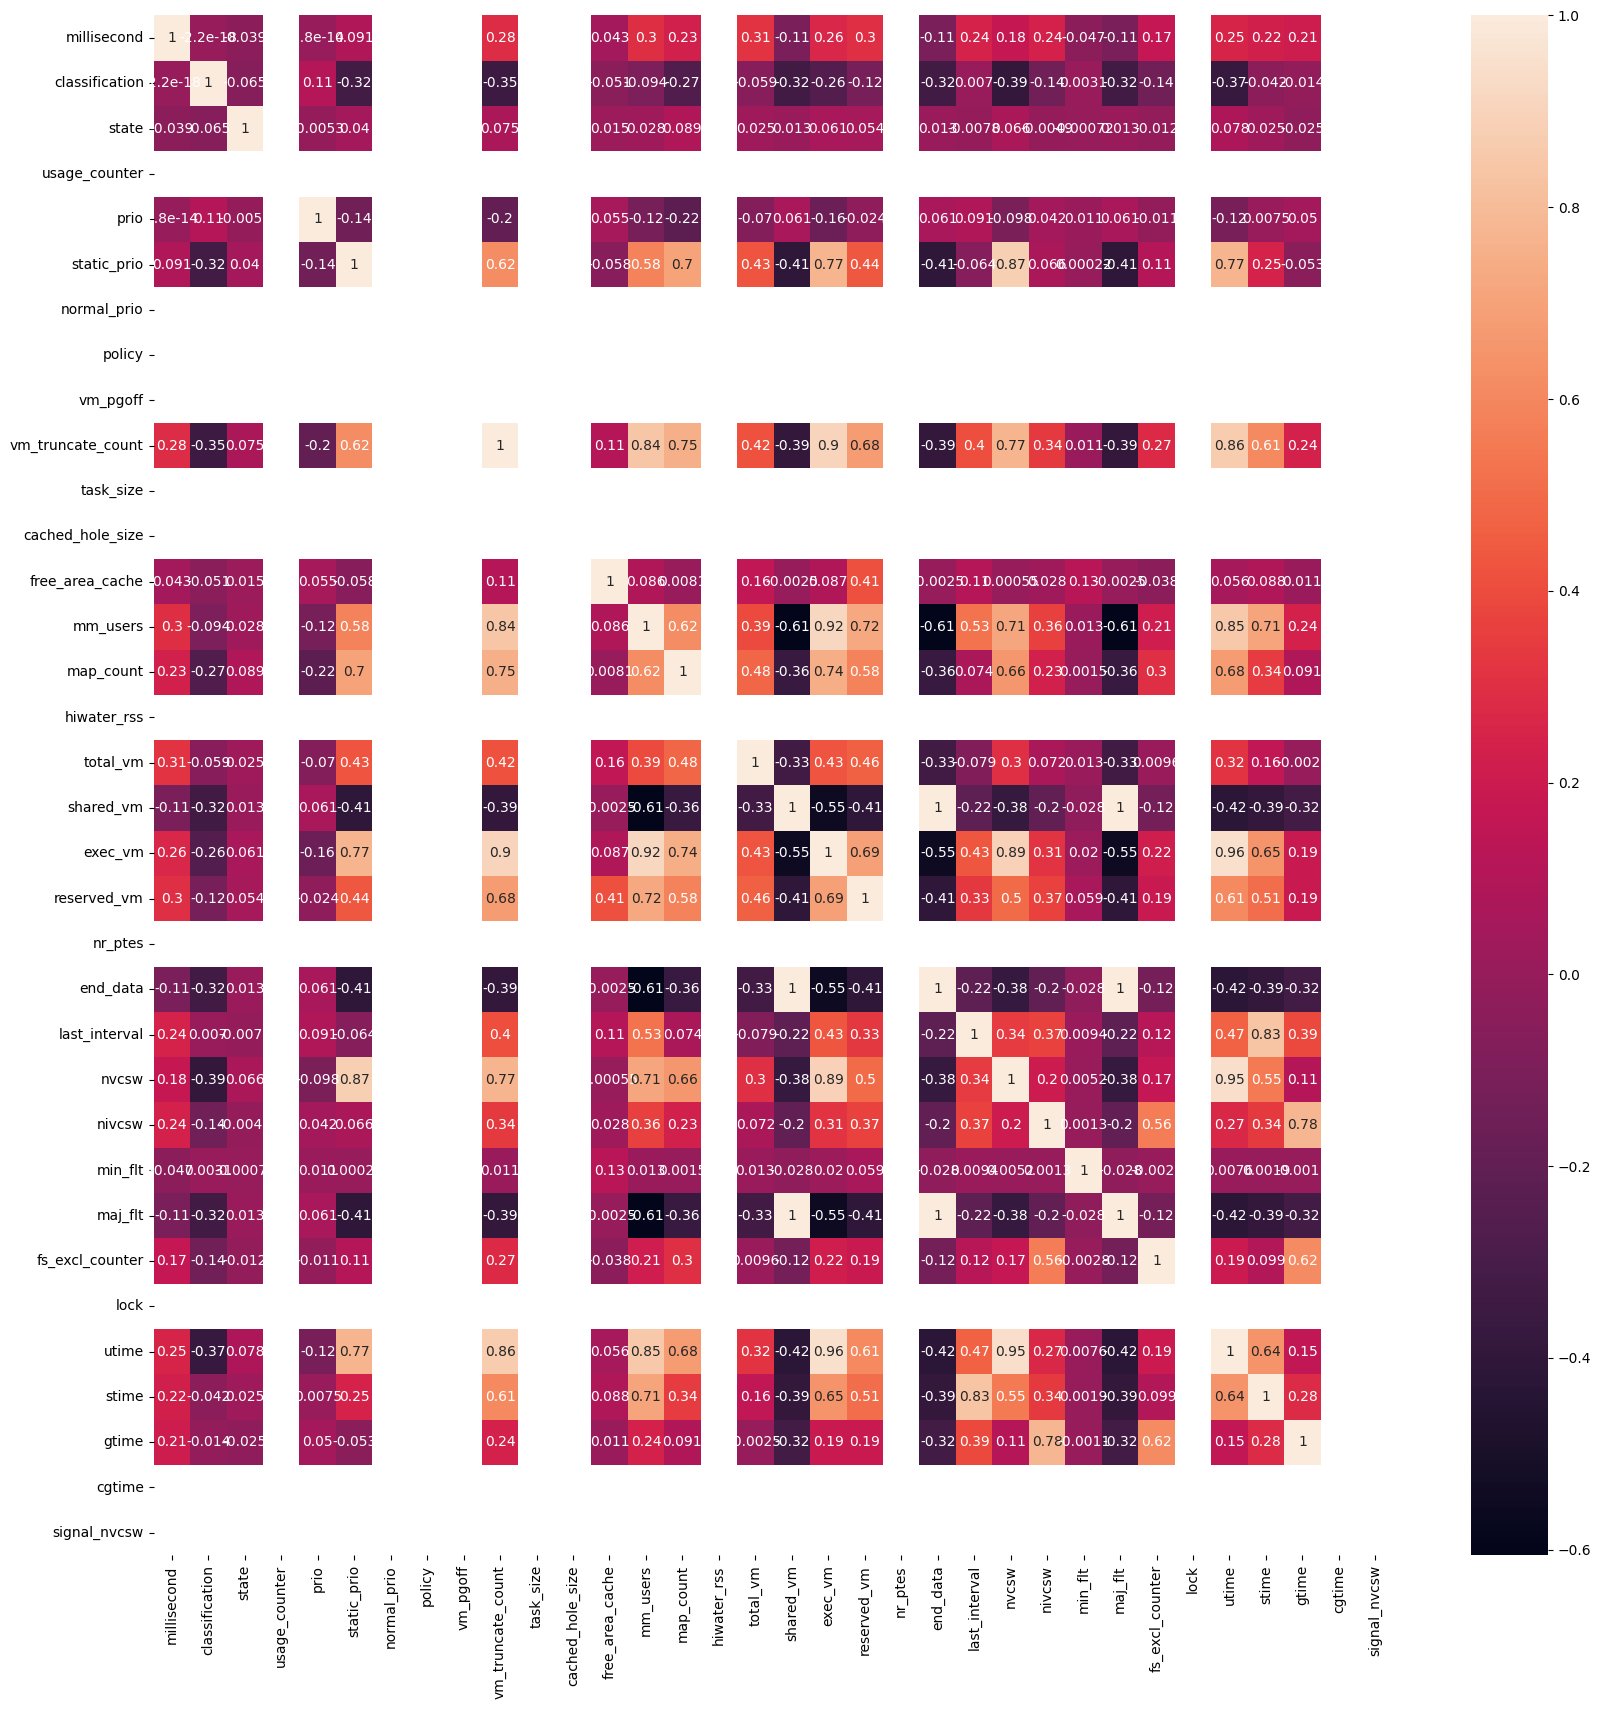

In [12]:
corrMatrix = df.corr()
plt.figure(1 ,figsize = (20 , 20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [13]:
X = df.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
Y = df["classification"]

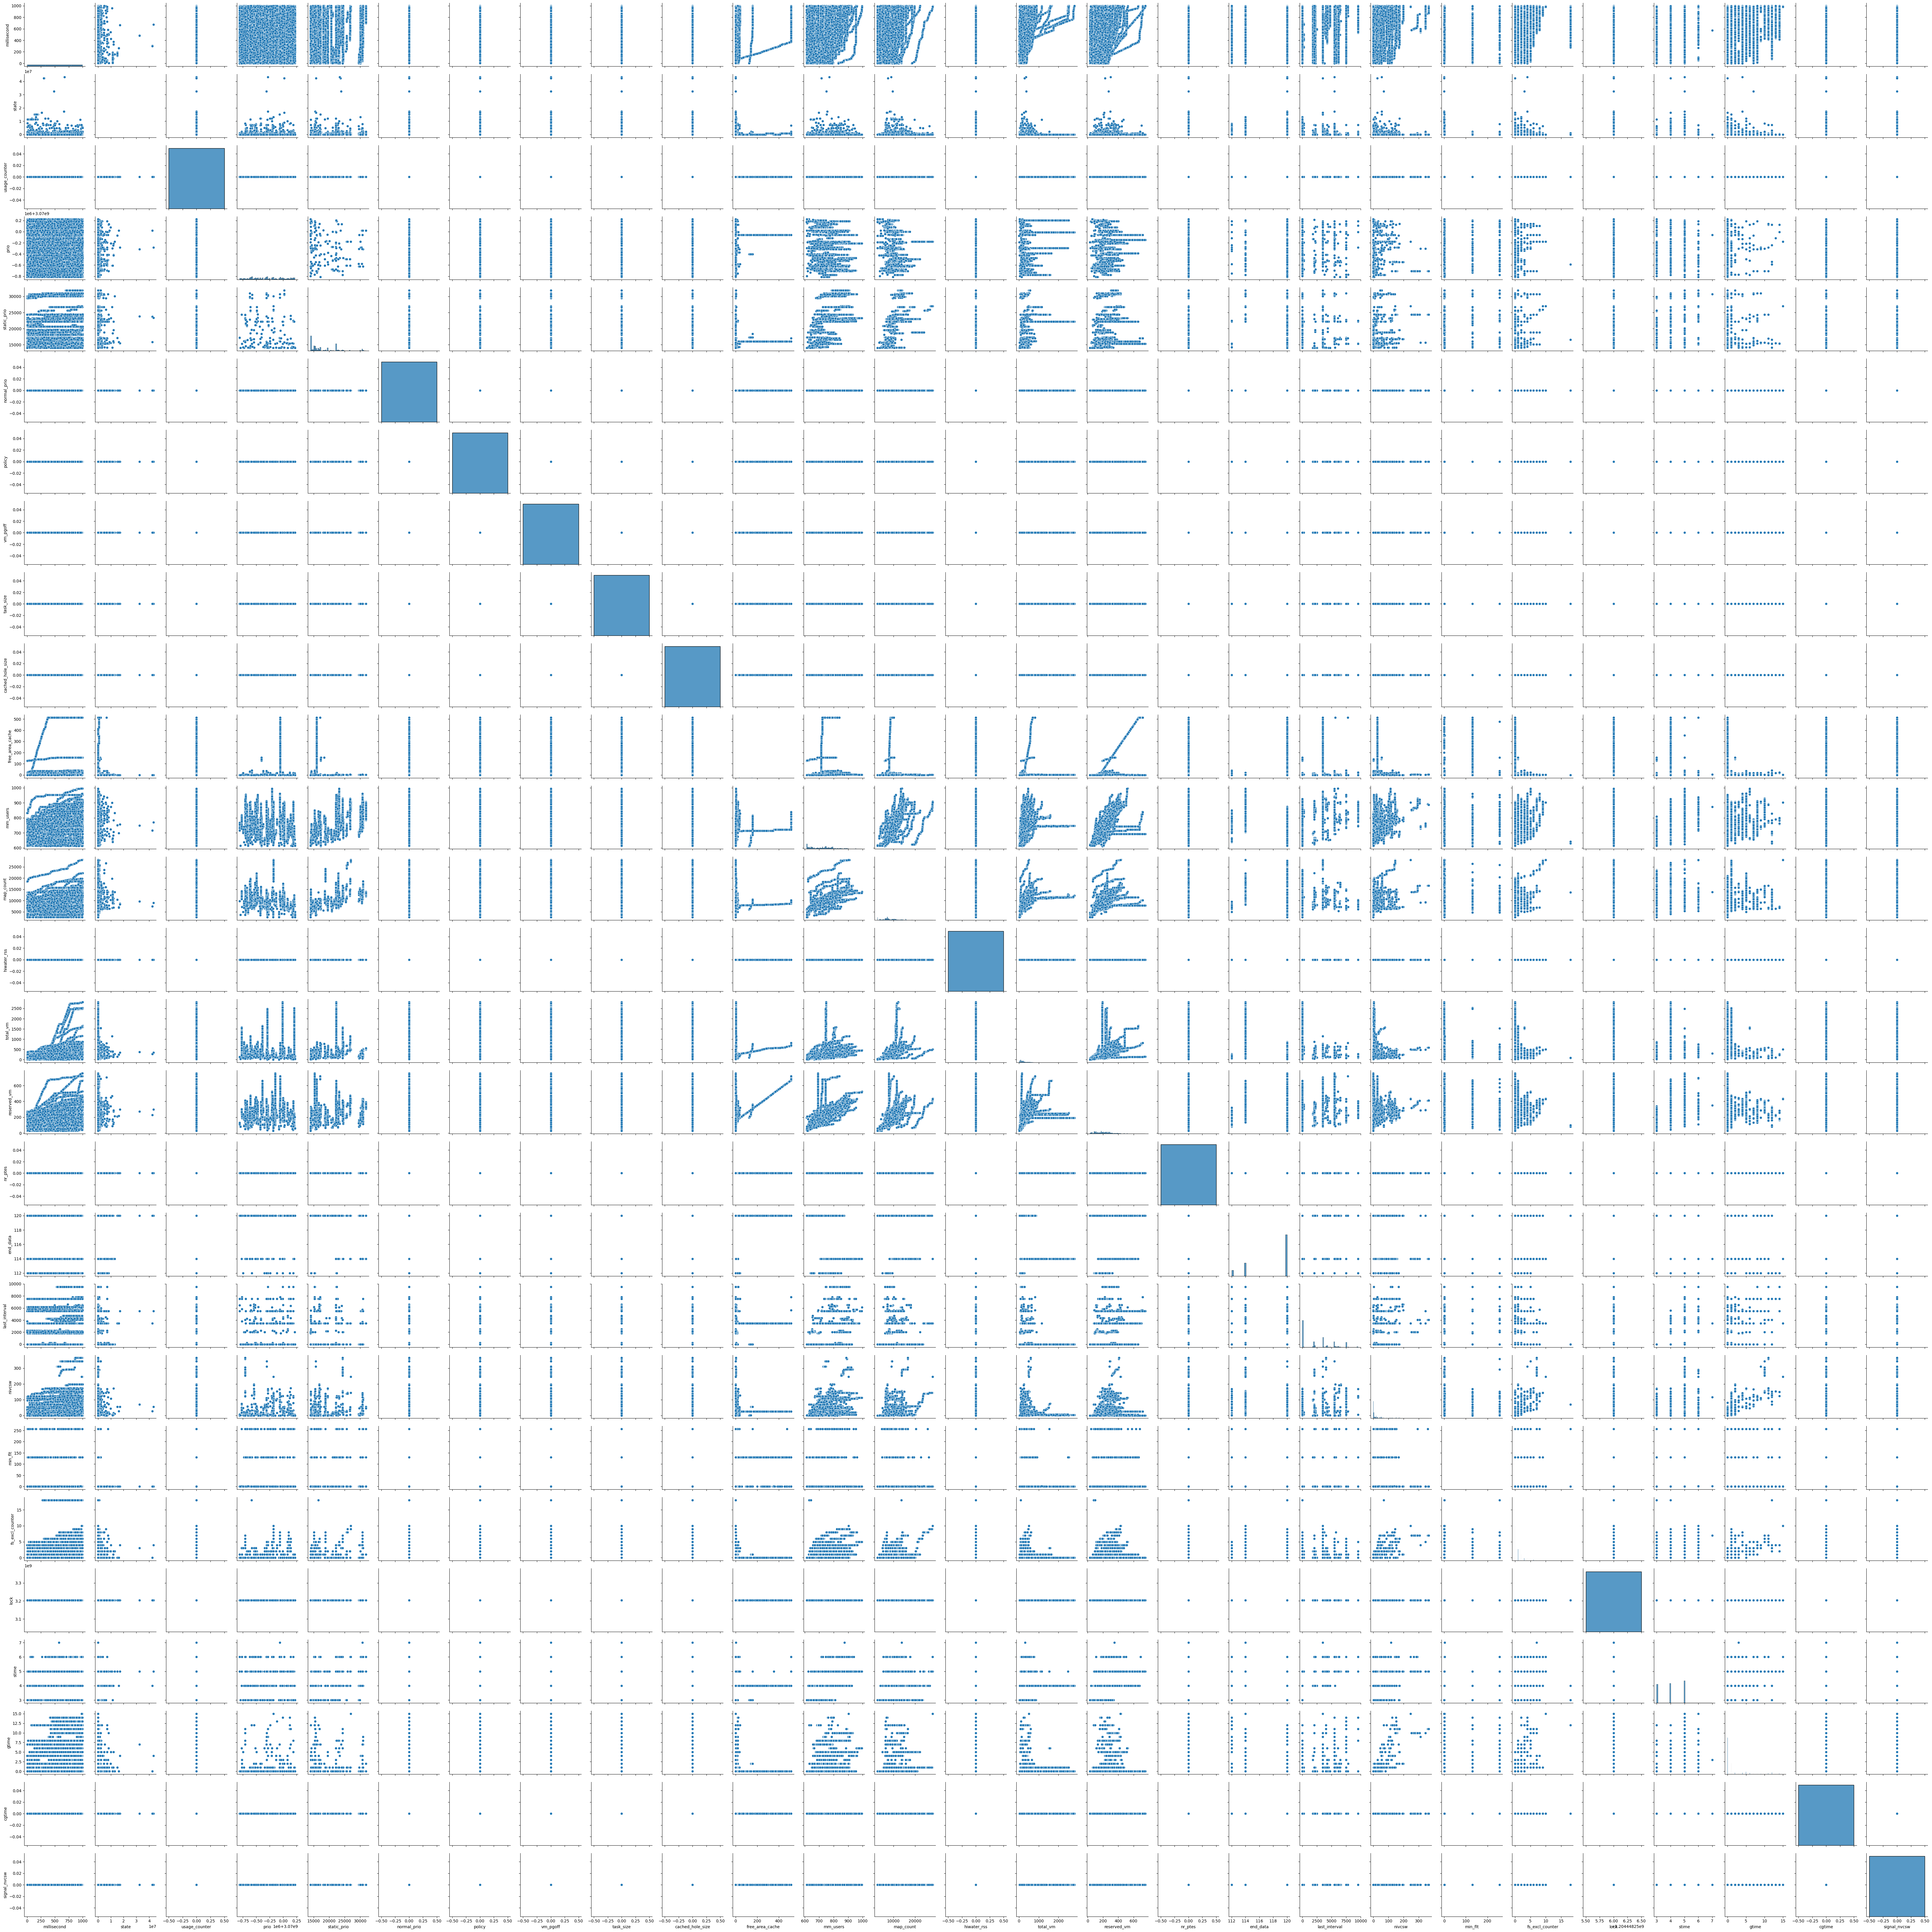

In [14]:
sns.pairplot(X)

In [15]:
x_train,x_test,y_train,y_test=tt(X,Y,test_size=0.25,shuffle=True, random_state=3)

In [16]:
x_train.shape

(75000, 27)

In [17]:
y_train.shape

(75000,)

Before we feed to a NN, we need to normalize the data

In [18]:
# Data normalization

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_predSVM = clf.predict(x_test)

In [20]:
print(confusion_matrix(y_test , y_predSVM))
print('')
print('Accuracy : {}'.format(accuracy_score(y_test , y_predSVM)))
print('')
print('Classification Report : \n{}'.format(classification_report(y_test , y_predSVM)))
print("cohen kappa score")
print(cohen_kappa_score(y_test, y_predSVM))

[[11799   815]
 [  836 11550]]

Accuracy : 0.93396

Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     12614
           1       0.93      0.93      0.93     12386

    accuracy                           0.93     25000
   macro avg       0.93      0.93      0.93     25000
weighted avg       0.93      0.93      0.93     25000

cohen kappa score
0.8679069893668246


The result I got here is 94% and cohen Kappa Score is 0.8704. This is not effective method to detect malware so

Now I am using Gaussian Naive Bayes Algorithm for malware Detection

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predGNB = gnb.predict(x_test)

In [22]:
print(confusion_matrix(y_test , predGNB))
print('')
print('Accuracy : {}'.format(accuracy_score(y_test , predGNB)))
print('')
print('Classification Report : \n{}'.format(classification_report(y_test , predGNB)))
print("cohen kappa score")
print(cohen_kappa_score(y_test, predGNB))

[[ 4749  7865]
 [  930 11456]]

Accuracy : 0.6482

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.38      0.52     12614
           1       0.59      0.92      0.72     12386

    accuracy                           0.65     25000
   macro avg       0.71      0.65      0.62     25000
weighted avg       0.72      0.65      0.62     25000

cohen kappa score
0.29988419742328853


The result I got here is 93% and cohen kappa score 0.2966. its prediction is lower then SVM. It is not good so

Now I am using KNN Algorithm for malware Detection

In [23]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    predKNN = neigh.predict(x_test)
      

In [24]:
print(confusion_matrix(y_test , predKNN))
print('')
print('Accuracy : {}'.format(accuracy_score(y_test , predKNN)))
print('')
print('Classification Report : \n{}'.format(classification_report(y_test , predKNN)))
print("cohen kappa score")
print(cohen_kappa_score(y_test, predKNN))
print("")

[[12607     7]
 [   19 12367]]

Accuracy : 0.99896

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12614
           1       1.00      1.00      1.00     12386

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

cohen kappa score
0.9979198087688522



The result I got here is 100% which is good but Cohen Kappa Score is 9980. KNN is good but not effective so

Now I am using Decision Tree Algorithm for malware Detection

In [25]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
predDT = clf.predict(x_test)

In [26]:
print(confusion_matrix(y_test , predDT))
print('')
print('Accuracy : {}'.format(accuracy_score(y_test , predDT)))
print('')
print('Classification Report : \n{}'.format(classification_report(y_test , predDT)))
print("cohen kappa score")
print(cohen_kappa_score(y_test, predDT))
print("")

[[12614     0]
 [    0 12386]]

Accuracy : 1.0

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12614
           1       1.00      1.00      1.00     12386

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

cohen kappa score
1.0



The result I got here is 100% and Cohen Kappa Score is 1 So far Decision Tree is more efficient method to detect Malware

Now I am using Random Forest Algorithm for malware Detection

In [27]:
from sklearn.ensemble import RandomForestClassifier

rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(x_train,y_train)
predRF=rdF.predict(x_test)

In [28]:
print(confusion_matrix(y_test , predRF))
print('')
print('Accuracy : {}'.format(accuracy_score(y_test , predRF)))
print('')
print('Classification Report : \n{}'.format(classification_report(y_test , predRF)))
print("cohen kappa score")
print(cohen_kappa_score(y_test, predRF))
print("")

[[12614     0]
 [    0 12386]]

Accuracy : 1.0

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12614
           1       1.00      1.00      1.00     12386

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

cohen kappa score
1.0



The result I got here is 100% and Cohen Kappa Score is 1. Random Forest is also more efficient method to detect Malware

I used Support Vector Machine,Gaussian Baiy Naives, K-Nearest Naighbor, Decision Tree and Random Forest Algorithm

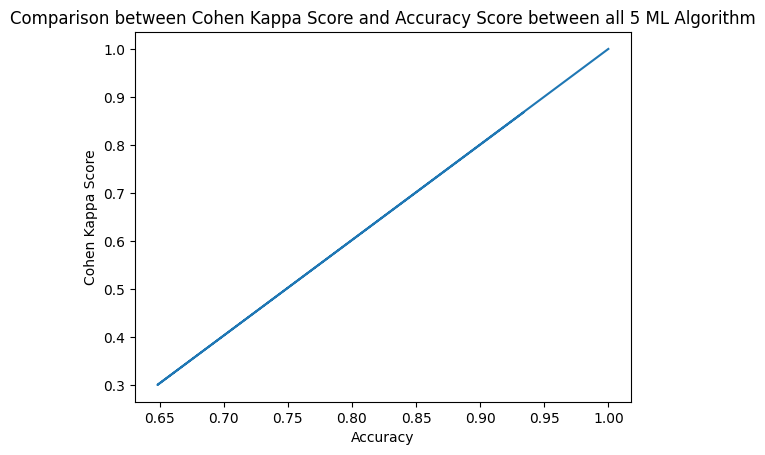

In [29]:
#Cohen Kappa Score of All algorithm
svmCKS = cohen_kappa_score(y_test, y_predSVM)
gbnCKS = cohen_kappa_score(y_test, predGNB)
knnCKS = cohen_kappa_score(y_test, predKNN)
dtCKS = cohen_kappa_score(y_test, predDT)
rfCKS = cohen_kappa_score(y_test, predRF)

#Accuracy Score of All algorithm
svmAC = accuracy_score(y_test, y_predSVM)
gbnAC = accuracy_score(y_test, predGNB)
knnAC = accuracy_score(y_test, predKNN)
dtAC = accuracy_score(y_test, predDT)
rfAC = accuracy_score(y_test, predRF)

A = [svmCKS, gbnCKS, knnCKS, dtCKS, rfCKS]
B = [svmAC, gbnAC, knnAC, dtAC, rfAC]

plt.plot(B,A)
plt.xlabel('Accuracy')
plt.ylabel('Cohen Kappa Score')
plt.title('Comparison between Cohen Kappa Score and Accuracy Score between all 5 ML Algorithm')
plt.show()

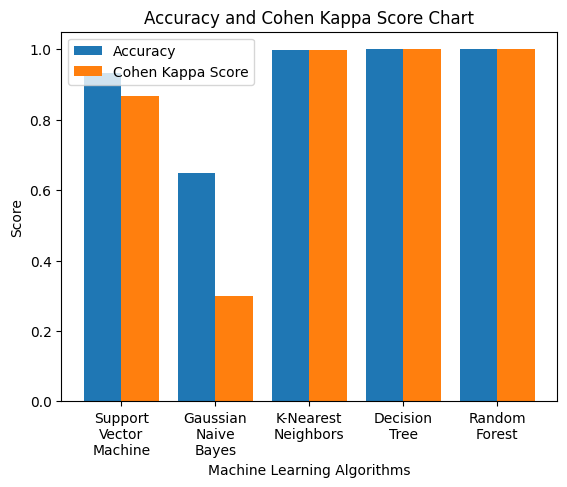

In [30]:
Algorithm = ['Support\nVector\nMachine','Gaussian\nNaive\nBayes','K-Nearest\nNeighbors','Decision\nTree', 'Random\nForest']
X_axis = np.arange(len(Algorithm))
plt.bar(X_axis - 0.2, B, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, A, 0.4, label = 'Cohen Kappa Score')
plt.xticks(X_axis, Algorithm)
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Score")
plt.title("Accuracy and Cohen Kappa Score Chart")
plt.legend()
plt.show()